In [1]:
import pump_probe

In [2]:
import numpy as np
import pandas as pd
import scipy as sci

from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator

In [3]:
from pump_probe.filesort import file_sort

In [4]:
f_path = 'data/power/'
power_from = 0 # 提取文件名中power的部分
power_to = -12

file_info = {
    "f_path":f_path,
    "power_from": power_from,
    "power_to": power_to,
    "reverse": True,
}


In [5]:
files = file_sort(file_info)

In [6]:
from pump_probe.filedata import FileData as fileData

In [7]:
fileData_list = []
for file in files:
    file_name = file_info["f_path"] + file
    f = fileData(file, file_info)
    f.shift_to_zero()
    fileData_list.append(f)

In [8]:
n_files = len(files)


In [9]:
from pump_probe.generatingColor import generating_color

In [10]:
color_bar_style = "rainbow"
color_list = generating_color(n_files, color_bar_style)

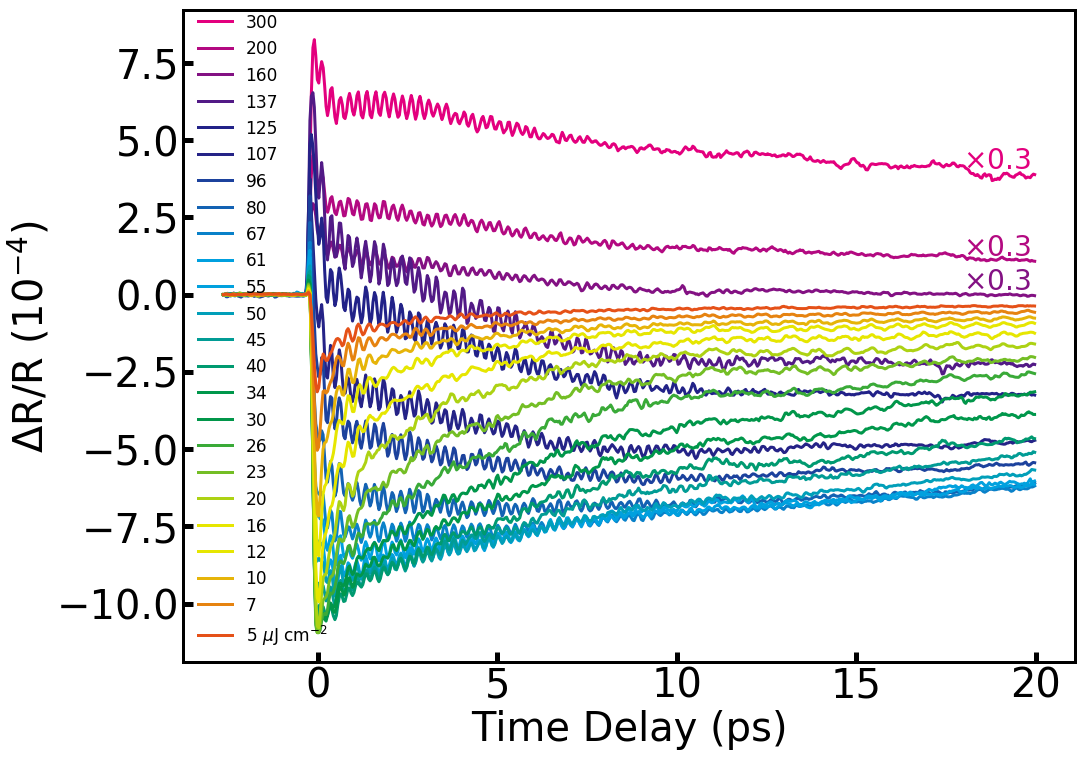

In [11]:
n_files = len(files)

plt.figure(figsize=(16,12))
plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in'

shift = 0.05

i = 0
for fileData in fileData_list:
    position = fileData.position
    time = fileData.time
    value_t = fileData.value
    power = fileData.power
    value_t = 20*value_t
    
    if i <3:
        value_t = value_t*0.3
        plt.text(time[-1]-2,value_t[-1]+0.2,r'$\times$0.3',fontdict={'size':'28','color':color_list[i]})
    if i == len(files)-1:
        plt.plot(time,value_t+0*(len(files)-i-1),label=str(int(power*10))+r" $\mu$J cm$^{-2}$",color=color_list[i],linewidth=3)
    else:
        plt.plot(time,value_t+0*(len(files)-i-1),label=str(int(power*10)),color=color_list[i],linewidth=3)
    i += 1

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Time Delay (ps)',fontsize=40)
plt.ylabel(r'$\Delta$R/R (10$^{-4}$)',fontsize=40)
plt.legend(fontsize=17,frameon=False,loc='lower left')

set_lw = 3
ax=plt.gca()
ax.spines['bottom'].set_linewidth(set_lw)
ax.spines['left'].set_linewidth(set_lw)
ax.spines['right'].set_linewidth(set_lw)
ax.spines['top'].set_linewidth(set_lw)


for tickline in ax.xaxis.get_ticklines():
    tickline.set_markersize(10)
    tickline.set_markeredgewidth(5)
for tickline in ax.yaxis.get_ticklines():
    tickline.set_markersize(10)
    tickline.set_markeredgewidth(5)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")


plt.savefig('output/Power dependent time domain.eps',bbox_inches = 'tight')
plt.show()